In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BOA Data (1).csv")

In [3]:
len(df)

10000

In [4]:
boa = df.copy()

In [5]:
boa.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#checking the null values
boa.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#droping a feature 
boa.drop(['Surname'], axis = 1, inplace = True)
boa.head(3)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


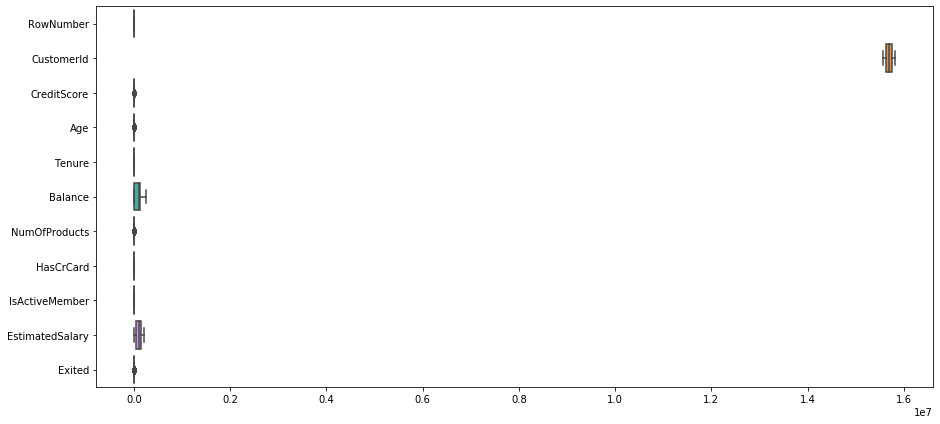

In [8]:
#checking the outliars using boxplot
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data = boa, orient='h')

In [9]:
#Encoding the data using hot labe encoder method
boa = pd.get_dummies(boa)
boa.head(5)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [10]:
boa.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [11]:
#Arrenging the features
boa = boa[['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male','Exited']]

In [12]:
boa

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,1


In [13]:
#splitting the data to dependent(y) and independent(x) variabels
x = boa.iloc[:,:-1]
y = boa.iloc[:,-1]

In [14]:
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [16]:
#splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [17]:
#checking the length of train and test
print("no. of training sampels = ", len(x_train))
print("no. of testing sampels = ", len(x_test))

no. of training sampels =  7000
no. of testing sampels =  3000


In [18]:
#scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
x_train[:,0].mean()

2.1316282072803006e-17

In [20]:
x_train[:,0].std()

1.0

In [21]:
#Model building
def predict_model(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    print(f'The results of {model_name}: Accuracy = {round(accuracy_score(model_pred, y_test),2)}')


In [22]:
predict_model(LogisticRegression(), "Logistic Regression", x_train, x_test, y_train, y_test)
predict_model(DecisionTreeClassifier(), "Decision Tree", x_train, x_test, y_train, y_test)
predict_model(RandomForestClassifier(), "Random forest", x_train, x_test, y_train, y_test)
predict_model(GaussianNB(), "Naive Bayes", x_train, x_test, y_train, y_test)
predict_model(KNeighborsClassifier(), "KNN", x_train, x_test, y_train, y_test)
predict_model(SVC(), "svm", x_train, x_test, y_train, y_test)



The results of Logistic Regression: Accuracy = 0.81
The results of Decision Tree: Accuracy = 0.8
The results of Random forest: Accuracy = 0.86
The results of Naive Bayes: Accuracy = 0.82
The results of KNN: Accuracy = 0.82
The results of svm: Accuracy = 0.85


By using predictive algorithm models 'Random forest' and 'svm' got highest and same accuracy that is 85%

## k fold cross validation

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
score_lr = cross_val_score(LogisticRegression(), x, y, cv = 5)
score_dt   = cross_val_score(DecisionTreeClassifier(),x, y, cv = 10)
score_rf  = cross_val_score(RandomForestClassifier(),x, y, cv = 10)
score_nb   = cross_val_score(GaussianNB(),x, y, cv = 10)
score_knn  = cross_val_score(KNeighborsClassifier(),x, y, cv = 10)
score_svm  = cross_val_score(SVC(),x, y, cv = 10)

In [38]:
print("Mean accuaracy of all Algorithms\n")
print("Logistic regression:", round(score_lr.mean(),3))
print("Decision tree:", round(score_dt.mean(),3))
print("Random forest:", round(score_rf.mean(),3))
print("Naive bayes:", round(score_nb.mean(),3))
print("svc:", round(score_svm.mean(),3))
print("KNN:", round(score_knn.mean(),3))

Mean accuaracy of all Algorithms

Logistic regression: 0.796
Decision tree: 0.79
Random forest: 0.859
Naive bayes: 0.784
svc: 0.796
KNN: 0.762


By using k fold cross validation Random forest got highest accuracy that is 84.5%

#### User defined function of all predictive algorithms below:

## stratified k fold cross validation

In [39]:
from sklearn.model_selection import StratifiedKFold

In [40]:
def stratifiedkfold(x, y, model):
    from sklearn.model_selection import StratifiedKFold
    accuracy_list = []
    skf = StratifiedKFold(n_splits = 10, random_state = 100)
    skf.get_n_splits(x, y)
    for train_index, test_index in skf.split(x, y):
        x1_train, x1_test = x.iloc[train_index], x.iloc[test_index]
        y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(x1_train, y1_train)
        y_pred = model.predict(x1_test)
        accuracy_list.append(accuracy_score(y_pred, y1_test))
    return accuracy_list
        

In [42]:
skf_lr = np.mean(stratifiedkfold(x, y, LogisticRegression()))
skf_dt = np.mean(stratifiedkfold(x, y, DecisionTreeClassifier()))
skf_nb = np.mean(stratifiedkfold(x, y, GaussianNB()))
skf_rf = np.mean(stratifiedkfold(x, y,RandomForestClassifier()))
skf_knn = np.mean(stratifiedkfold(x, y,KNeighborsClassifier()))
skf_svm = np.mean(stratifiedkfold(x, y,SVC()))

C:\Users\Krishna Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Krishna Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Krishna Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Krishna Vamshi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_stat

In [43]:
print("Mean accuracy score of Logistic regression in skf:", skf_lr)
print("Mean accuracy score of Logistic regression in skf:", skf_dt)
print("Mean accuracy score of Logistic regression in skf:", skf_nb)
print("Mean accuracy score of Logistic regression in skf:", skf_rf)
print("Mean accuracy score of Logistic regression in skf:", skf_knn)
print("Mean accuracy score of Logistic regression in skf:", skf_svm)

Mean accuracy score of Logistic regression in skf: 0.7962999999999999
Mean accuracy score of Logistic regression in skf: 0.7828
Mean accuracy score of Logistic regression in skf: 0.7840999999999999
Mean accuracy score of Logistic regression in skf: 0.8603
Mean accuracy score of Logistic regression in skf: 0.7618
Mean accuracy score of Logistic regression in skf: 0.7962999999999999


In [ ]:
#boa.describe()